In [4]:
import kaggle
!kaggle datasets download ayushimishra2809/movielens-dataset -f movies.csv
!kaggle datasets download ayushimishra2809/movielens-dataset -f ratings.csv

Dataset URL: https://www.kaggle.com/datasets/ayushimishra2809/movielens-dataset
License(s): unknown




  0%|          | 0.00/504k [00:00<?, ?B/s]
100%|██████████| 504k/504k [00:01<00:00, 358kB/s]
100%|██████████| 504k/504k [00:01<00:00, 358kB/s]


Dataset URL: https://www.kaggle.com/datasets/ayushimishra2809/movielens-dataset
License(s): unknown




  0%|          | 0.00/701k [00:00<?, ?B/s]
100%|██████████| 701k/701k [00:00<00:00, 1.13MB/s]
100%|██████████| 701k/701k [00:00<00:00, 1.13MB/s]


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_ratings = pd.read_csv(r"C:\Users\Admin\Desktop\Data Analyst\2025\Recommendation\ratings.csv")
df_movies = pd.read_csv(r"C:\Users\Admin\Desktop\Data Analyst\2025\Recommendation\movies.csv")

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [6]:
movie_data = pd.merge(df_ratings, df_movies, on='movieId')

movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [8]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Shackleton's Antarctic Adventure (2001)                      5.0
21 Up (1977)                                                 5.0
Mummy's Hand, The (1940)                                     5.0
Hunchback of Notre Dame, The (Notre Dame de Paris) (1956)    5.0
Barenaked in America (1999)                                  5.0
Name: rating, dtype: float64

In [9]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [11]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


Text(0.5, 1.0, 'Rating Count Representation \n')

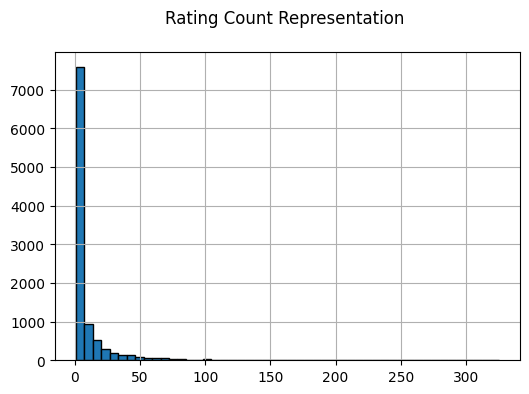

In [ ]:
plt.figure(figsize=(6,4))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)
plt.title('Rating Count Distribution \n')

Text(0.5, 1.0, 'Rating Distribution \n')

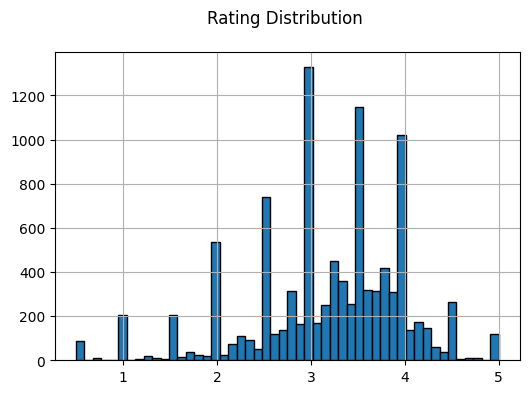

In [22]:
plt.figure(figsize=(6,4))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)
plt.title('Rating Distribution \n')

<Figure size 1000x800 with 0 Axes>

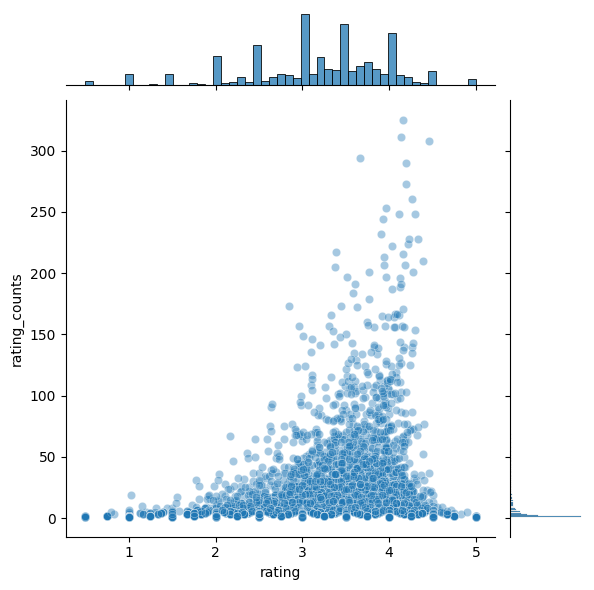

In [25]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [26]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')

user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

forrest_gump_ratings.head()

userId
1    3.0
2    NaN
3    3.0
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [38]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [39]:
corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.056266
(500) Days of Summer (2009),0.144325
*batteries not included (1987),0.000000
...And Justice for All (1979),0.089924
10 (1979),0.693375


In [40]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
"Passenger, The (Professione: reporter) (1975)",1.0
1984 (1956),1.0
187 (One Eight Seven) (1997),1.0
Other People's Money (1991),1.0
"Out of Towners, The (1970)",1.0
Bright Star (2009),1.0
Married Life (2007),1.0
Two Girls and a Guy (1997),1.0
Under the Rainbow (1981),1.0


In [41]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.056266,20
(500) Days of Summer (2009),0.144325,37
*batteries not included (1987),0.000000,11
...And Justice for All (1979),0.089924,10
10 (1979),0.693375,3


In [42]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,311
Happy Gilmore (1996),0.715602,79
12 Angry Men (1957),0.545139,63
As Good as It Gets (1997),0.521448,98
First Knight (1995),0.520438,52
